## Handling Missing Categorical Data

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [34]:
df=pd.read_csv("housing_dataset.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [35]:
df.sample(3)

,FireplaceQu,GarageQual,SalePrice
170,NaN,TA,128500
1070,NaN,TA,135000
924,TA,TA,207500


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [37]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

## Most Frequent Imputation 

Text(0, 0.5, 'Number of Houses')

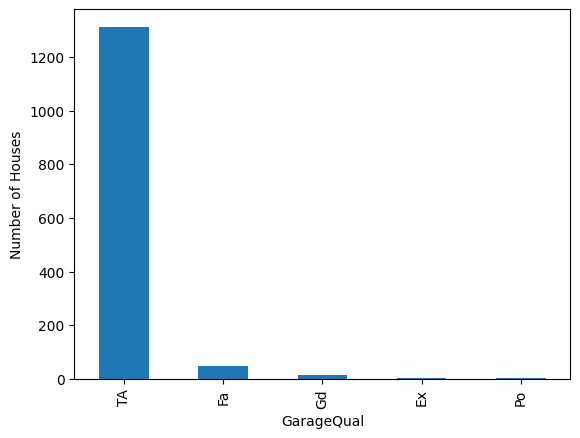

In [38]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Houses')

In [39]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

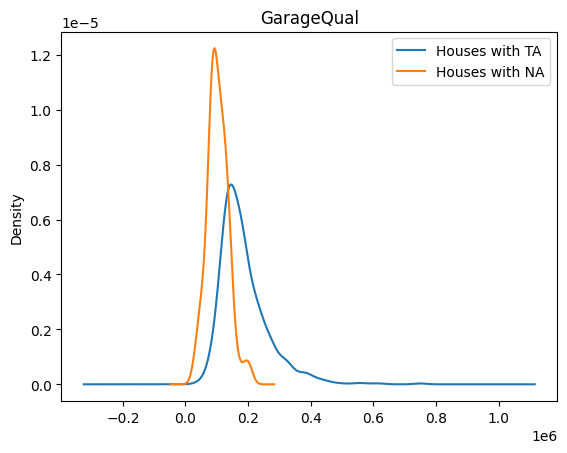

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['Houses with TA','Houses with NA']
ax.legend(lines, labels)   
plt.title('GarageQual')

In [41]:
temp=df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

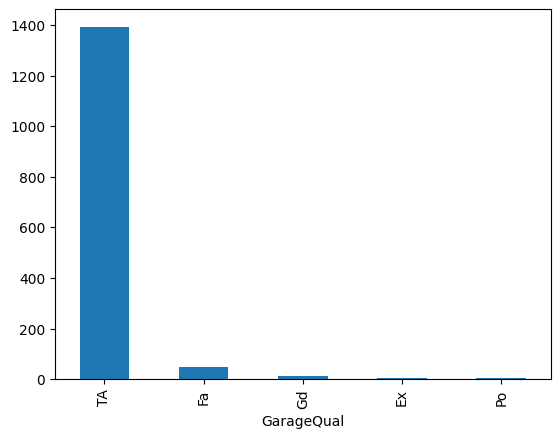

In [42]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

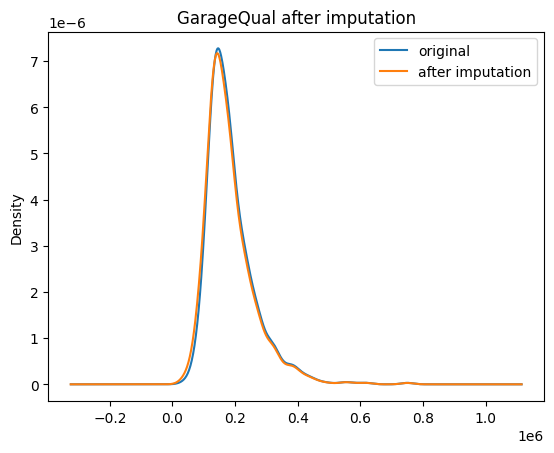

In [43]:
fig=plt.figure()
ax=plt.subplot(111)
temp.plot(kind='kde',ax=ax)
#distribution of variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels=['original','after imputation']
ax.legend(lines, labels)
plt.title('GarageQual after imputation')
plt.show()

### Missing Category Imputation 

In [44]:
df1=pd.read_csv('housing_dataset.csv')

In [45]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df1['GarageQual'].fillna('Missing', inplace=True)


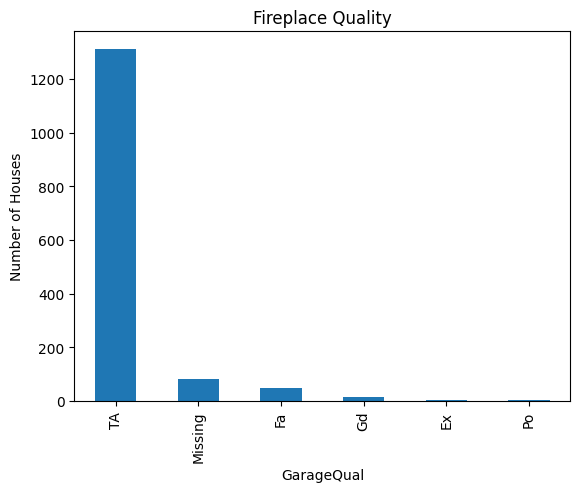

In [49]:
df1['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Houses')
plt.title('Fireplace Quality')
plt.show()